## How a Kalman filter works, in pictures
### How a Kalman filter sees your problem
1. Kalman filter is used in a place where you have *uncertain information* about some dynamic system and you can make an *educated guess* about what the system is going to do next. Kalman filter is ideal for systems which are *continuously changing*, as this will generate sufficient information for as the filter iteratively corrects for prediction errors.
2. A Kalman filter assumes that the the variables in the state vector are *random* and *gaussian distributed*. Each variable has a **mean** $\mu$ and **variance** $\sigma^2$ which is the uncertainty:
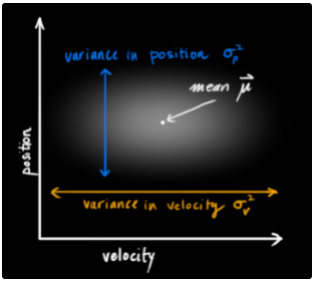
3. Here, the states are uncorrelated, i.e. the probability distribution of one does not depend on the other. From a state space model point of view, the state transition matrix $F$ is a diagonal element. In most dynamical systems, however, these state variables are related, for example, if the velocity is high, we would expect a huge change in position.
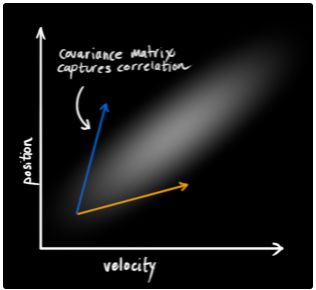

### Describing the problem with matrices
1. We model the best estimate and its covariance as gaussian distribution variables. The best estimate $\hat x_k$ is simply the mean $\mu$ of the distribution and the uncertainty around it is the covariance matrix $P_k = \begin{bmatrix} \Sigma_{11} & \vdots \\ \vdots & \Sigma_{nn} \end{bmatrix}$
2. Given the current state at time $k-1$, we can predict the next state at $k$ considering the its probability distribution
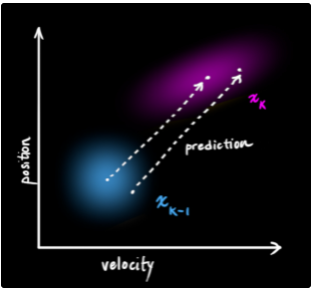
3. The relationship between the two distribution can be captured by the state transition matrix:
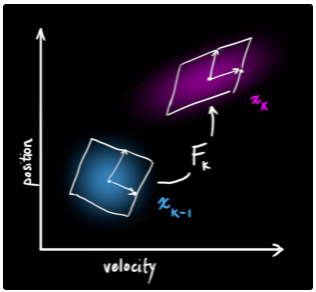
4. For a simple unit mass model, we have that $\hat x_k = F_k \hat x_{k-1}$ where $F_k = \begin{bmatrix} 1 & \Delta t \\ 0 & 1 \end{bmatrix}$. For the covariance, we can use the identity $Cov(x) = \Sigma, Cov(Ax) = A \Sigma A^T$. Thus, $P_k = F_k P_{k-1} F_k^T$.

### External inputs and uncertainty
1. To factor in external inputs, we have $\hat x_k = F_k \hat x_{k-1} + B_k u_k$
2. Now, what about external uncertainty that we don't know about? To this end, we can say that each point in $\hat x_{k-1}$ is moved to somewhere inside a Gaussian blob with covariance $Q_k$. We are now treating the untracked the influences as noise with covariance $Q_k$
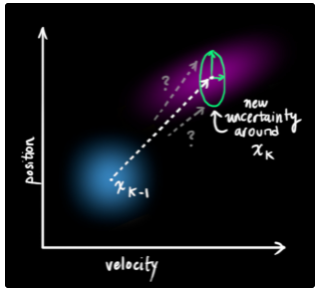
This results in the following image
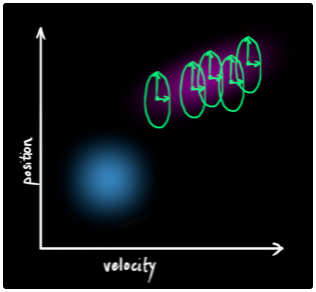
3. With this image, we can have the following probability distribution. The new prediction step is now $\hat x_k = F_k \hat x_{k-1} + B_k u_k$ and $P_k = F_k P_{k-1} F_k^T + Q_k$
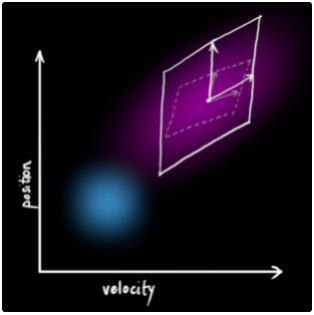

### Refining the estimate with measurements
1. We can include new measurements to refine our prediction. These measurements may give us direct state measurements. In most cases, only a subset of the measurements available are direct and the remaining subset will need to come from inference using indirect measurements.
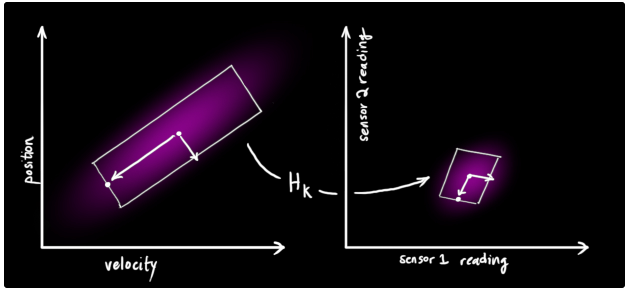
2. Using the map from sensor reading to state vector, we can figure out that $\mu_{expected} = H_k \hat x_k, \Sigma_{expected} = H_k P_k H_k^T$.
3. So now we have two gaussian distributions: one surrounding the mean of our transformed prediction and one surrounding the actual sensor reading we got.
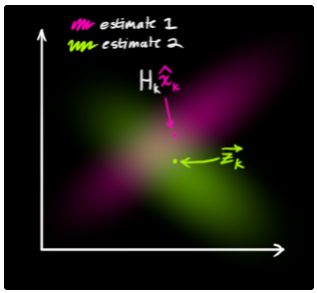
4. To reconcile both of them, we just multiply them together.
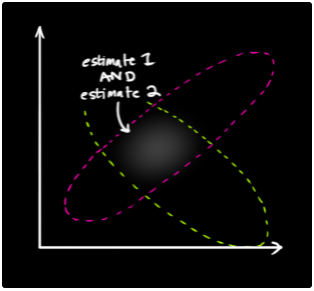
5. This results in the new gaussian distribution:
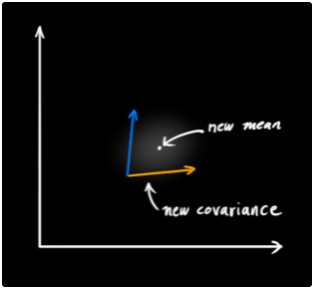
6. Multiplication of two gaussian distributions results in $\mathcal{N}(x,\mu_0, \sigma_0).\mathcal{N}(x,\mu_1, \sigma_1) = \mathcal{N}(x,\mu_0 + k(\mu_1-\mu_0),\sigma_0^2-k \sigma_0^2)$ where $k = \frac{\sigma_0^2}{\sigma_0^2 + \sigma_1^2}$. converting to matrices, $k \rightarrow K = \Sigma_0 (\Sigma_0 + \Sigma_1)^{-1}$

### Putting it all together
1. The two gaussian distribution of interest are $(\mu_0, \Sigma_0) = (H_k \hat x_k, H_k P_k H_k^T)$ and $(\mu_1, \Sigma_1) = (\hat z_k, R_k)$.
2. Using the distribution multiplication results above, we arrive at:
\begin{align}
H_k \hat x_k' &= H_k \hat x_k + K (z_k - H_k \hat x_k) \\
H_k P_k'H_k^T &= H_k P_k H_k^T - K H_k P_k H_k^T \\
\end{align}
3. Dividing both sides by $H_k$ and taking $K' = H_k^{-1} K$, we now see that $\hat x_k' = \hat x_k + K'(z_k - H \hat x_k)$ is the new best estimate. The corresponding covariance and the kalman gain are $P_k' = P_k - K' H_k P_k$ and $K' = P_k H_k^T (H_k P_k H_k^T + R_k)^{-1}$